# Vignette of API Galaxy_explorer
## This is a vignette providing an overview of usage our API for spectral analysis of DR18 data from the Sloan Digital Sky Survey (SDSS). This notebook provides examples of how to use the key features, functionalities, and capabilities that define our API. 

In [1]:
import time
# record the start time
start_time = time.time()

## Installing team2_api most recent version (0.1.4)

In [2]:
!pip install -i https://test.pypi.org/simple/ team2-api -q

## Imports

In [3]:
# imports not from API Galaxy_explorer

from SciServer import SkyQuery, SkyServer
from astropy.io import fits

from sklearn import preprocessing

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.widgets import RectangleSelector, Button
from scipy.integrate import trapz
from ipywidgets import interact


from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings("ignore")

In [4]:
# imports all functions and methods from our API from team2_api package latest version this version has the test path bug fixed

from team2_api.baseclass import Extractor
from team2_api.ml import SpectralClassifier
from team2_api.viz import Visualization

In [5]:
# get the current working directory, this should be the dir for this vignette in example subdir
current_dir = os.getcwd()
print(f'...{current_dir[16:]}')

.../classes/CS207/git/Team2_API_project/example


## Example Query 

In [6]:
# example user provides query
?Extractor.from_query

Signature: Extractor.from_query(query)
Docstring:
Executes given ADQL query from DR18 and constructs an instance of the class.

Parameters:
        query (str): The ADQL query string.

Raises:
        TypeError: If the input query is not a string.

Returns:
        Extractor: An instance of the Extractor class constructed from the query results.
File:      ~/micromamba/envs/myenv/lib/python3.10/site-packages/team2_api/baseclass/__init__.py
Type:      method

In [7]:
# example user provides query
example_query = "SELECT top 10 specObjID, class, lambdaEff, z, RUN2D, PLATE, MJD, FIBERID, ra, dec FROM SpecObj"

# create an instance using the class method
extract = Extractor.from_query(example_query)
meta_data = extract.get_data()
spec_dict = extract.get_spec_dict()

print("\n", type(meta_data), "\n", type(spec_dict))
meta_data.head(3)
next(iter(spec_dict.items()))

Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=495
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=496
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=497
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=498
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=499
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=500
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=501
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?pla

(7220532273447458816,
 [array([5.4443517 , 4.298821  , 3.153473  , ..., 7.532818  , 6.756952  ,
         0.14289352], dtype=float32),
  array([ 3561.2297,  3562.0508,  3562.8704, ..., 10339.515 , 10341.888 ,
         10344.272 ], dtype=float32)])

In [8]:
# example API runs query with coordinate input from user
?Extractor.from_params

Signature: Extractor.from_params(min_ra, max_ra, min_dec, max_dec)
Docstring:
Executes ADQL query based on input constraints and constructs an instance of the class.

Parameters:
        min_ra, max_ra, min_dec, max_dec (float): Constraints for the query.

Raises:
        TypeError: If any of the input parameters are not floats.

Returns:
        Extractor: An instance of the Extractor class constructed from the query results.
File:      ~/micromamba/envs/myenv/lib/python3.10/site-packages/team2_api/baseclass/__init__.py
Type:      method

In [9]:
# example API runs query with coordinate input from user
extract_coord = Extractor.from_params(185.0, 185.5, 15.0, 15.1)
meta_data_coord = extract_coord.get_data()
spec_dict_coord = extract_coord.get_spec_dict()

print("\n", type(meta_data_coord), "\n", type(spec_dict_coord))
meta_data_coord.head(3)
next(iter(spec_dict_coord.items()))

Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=394
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=392
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=1767&mjd=53436&fiberid=391
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=349
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=354
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=353
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=5398&mjd=56011&fiberid=351
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?pla

(6077716099880998912,
 [array([ 27.690226  ,  -0.56246597, -28.81177   , ...,   4.117115  ,
          -4.3469057 ,  -2.7110546 ], dtype=float32),
  array([ 3560.4106,  3561.2297,  3562.0508, ..., 10332.376 , 10334.747 ,
         10337.131 ], dtype=float32)])

## Example Meta Data

In [10]:
# example user provides meta data
example_meta_df = pd.read_csv("data/example.csv")

# example_meta_df_invalid = []
# check if valid df 
# Extractor._valid_df(example_meta_df_invalid)

Extractor._valid_df(example_meta_df)
instance_example = Extractor(example_meta_df)
example_spec_dict = instance_example.get_spec_dict()
next(iter(example_spec_dict.items()))

Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=495
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=496
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=497
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=498
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=499
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=500
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=501
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?pla

(7220532273447458816,
 [array([5.4443517 , 4.298821  , 3.153473  , ..., 7.532818  , 6.756952  ,
         0.14289352], dtype=float32),
  array([ 3561.2297,  3562.0508,  3562.8704, ..., 10339.515 , 10341.888 ,
         10344.272 ], dtype=float32)])

## Preprocessing

In [11]:
# preprocessing example meta data spec_dict 

# original dictionary
original_data = instance_example._spec_dict.copy()
# original DataFrame
original_df = instance_example.get_data().copy()

# remove outliers, negative flux
instance_example.remove_outliers()
# normalize flux
instance_example.normalize_flux()
# redshift correction
instance_example.redshift_correction()

# preprocessed data
preprocessed_dict = instance_example.get_spec_dict()
# DataFrame after redshift correction
data_after_redshift_correction = instance_example.get_data()

print("Original DataFrame:", original_df.shape)
print("DataFrame after Redshift Correction:", data_after_redshift_correction.shape)


Original DataFrame: (10, 10)
DataFrame after Redshift Correction: (10, 11)


In [12]:
start_wavelen = 6000
end_wavelen = 10000
num = 1000

# generate the linearly spaced array
common_wavelength_grid = np.linspace(start_wavelen, end_wavelen, num)

In [13]:
# interpolate 
speObjID, arr_flux_wave = next(iter(preprocessed_dict.items()))
interpol = instance_example.interpolate(speObjID, common_wavelength_grid)

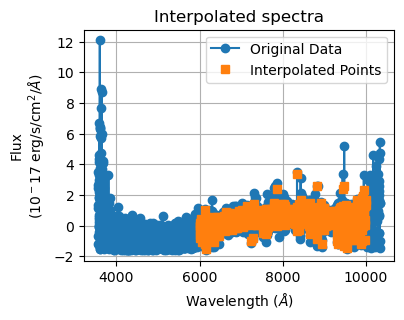

In [14]:
plt.figure(figsize=(4, 3))
plt.plot(arr_flux_wave[1], arr_flux_wave[0], 'o-', label='Original Data')
plt.plot(common_wavelength_grid, interpol, 's', label='Interpolated Points')
plt.title(f'Interpolated spectra')
plt.xlabel(f'Wavelength ($\\AA$)')
plt.ylabel(f'Flux\n($10^{-17}$ erg/s/cm$^2$/$\\AA$)')
plt.grid(True)
plt.legend()
plt.show()

## Visualization 

In [15]:
# visualizing example instance after preprocessing 
viz_instance = Visualization(instance_example)
specObjID = next(iter(instance_example.get_spec_dict().keys()))

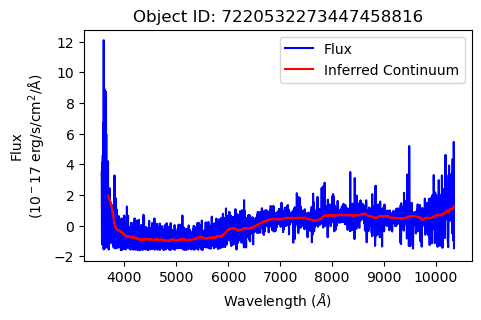

In [16]:
plt.figure(figsize=(5, 3))
viz_instance.visualize(specObjID = specObjID, moving_window_size = 100, interactive=False)

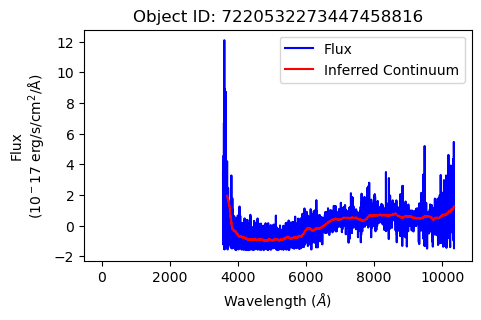

In [17]:
plt.figure(figsize=(5, 3))
viz_instance.visualize(specObjID = specObjID, moving_window_size = 100, interactive=True)

# run that code in python3 terminal for interactive viz

## Wavelength Alignment

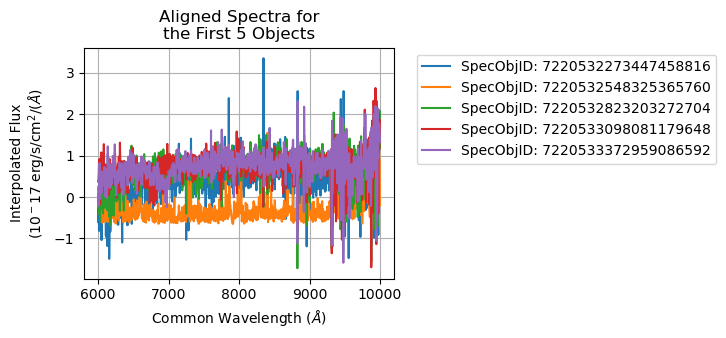

In [18]:
# align_wavelengths to align all spectra
aligned_data = instance_example.align_wavelength(start_wavelen, end_wavelen, num)

# plot the aligned spectra
plt.figure(figsize=(4, 3))  

for specObjID in list(aligned_data.keys())[:5]:
    data_dict = aligned_data[specObjID]
    inter_flux = data_dict['flux']
    wavelength = data_dict['wavelength']
    plt.plot(wavelength, inter_flux, label=f'SpecObjID: {specObjID}')

plt.xlabel(f'Common Wavelength ($\\AA$)')
plt.ylabel(f'Interpolated Flux\n($10^{-17}$ erg/s/cm$^2$/($\\AA$)')
plt.title('Aligned Spectra for\nthe First 5 Objects')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Machine Learning - Logistic Regression to Predict Object 

#### Label Mapping

STAR: 0\
GALAXY: 1\
QSO: 2

In [19]:
# running ML before preprocessing 
instance_example2 = Extractor(example_meta_df)
classifier = SpectralClassifier(instance_example2)

Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=495
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=496
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=497
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=498
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=499
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=500
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?plateid=6413&mjd=56336&fiberid=501
Attempting to open URL: http://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=full?pla

In [20]:
label_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}

In [21]:
# extract X features and y labels 
features, labels = classifier.get_features_labels()

# fit 
classifier.fit(features, labels)

# predict object label for 100 flux features
predict_label = classifier.predict(features[0].reshape(1, -1))
predict_prob = classifier.predict_proba(features[0].reshape(1, -1))
predicted_class_names = [key for key, value in label_mapping.items() if value in predict_label]

print(f"Predicted {predicted_class_names[0]} with probability {predict_prob[0][0]:.2f}")

Predicted GALAXY with probability 0.91


In [22]:
# get the confusion matrix for all the features and labels fitted on classifier 
# (this all the 10 objects from the instance_example2) 
conf_matrix = classifier.get_confusion_matrix(features, labels)
conf_matrix

array([[8, 0],
       [1, 1]])

In [23]:
TP = conf_matrix[0, 0]
TN = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Confusion Matrix:")
print(f"True Positive:  {TP}")
print(f"True Negative:  {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")

Confusion Matrix:
True Positive:  8
True Negative:  1
False Positive: 0
False Negative: 1


## Data Augmentation 

In the given implementation, the method augments the spectroscopic data associated with each object ID by calculating and appending derivatives based on the specified degree. It considers cases where the degree is 1, 2, or a positive float for fractional derivatives. The resulting augmented data is appended to the spectral dictonary. This example augments data after preprocessing. 

### Fractional Derivative 

In [24]:
start_time_1 = time.time()

### Fractional Derivative 
instance_example.augment_data(0.5)
frac_derv_spec_dict = instance_example.get_spec_dict()
next(iter(frac_derv_spec_dict.items()))

# record the end time
end_time_1 = time.time()

# calculate and print the elapsed time
elapsed_time_1 = end_time_1 - start_time_1
print(f"Elapsed time: {elapsed_time_1:.2f} seconds")

Elapsed time: 182.30 seconds


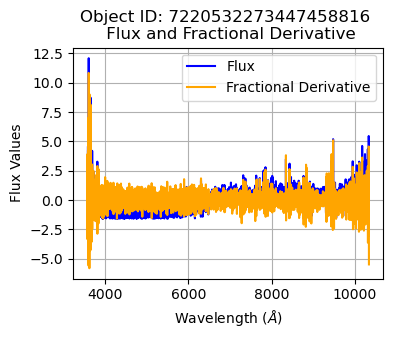

In [25]:
frac_object_id, data_arrays = next(iter(frac_derv_spec_dict.items()))

flux = data_arrays[0]
wavelength = data_arrays[1]
frac_derivative = data_arrays[2]

plt.figure(figsize=(4, 3))

plt.plot(wavelength, flux, label='Flux', color='blue')
# overlay Derivative
plt.plot(wavelength, frac_derivative, label='Fractional Derivative', color='orange')
plt.xlabel(f'Wavelength ($\\AA$)')
plt.ylabel('Flux Values')  
plt.title(f'Object ID: {frac_object_id} \n Flux and Fractional Derivative')
plt.grid(True)
plt.legend()
#plt.xlim(3500, 3600)
#plt.ylim(-2, 2)
plt.show()

### First Derivative 

In [26]:
start_time_2 = time.time()

instance_example.augment_data(1)
first_derv_spec_dict = instance_example.get_spec_dict()
next(iter(first_derv_spec_dict.items()))

# record the end time
end_time_2 = time.time()

# calculate and print the elapsed time
elapsed_time_2 = end_time_2 - start_time_2
print(f"Elapsed time: {elapsed_time_2:.2f} seconds")

Elapsed time: 0.01 seconds


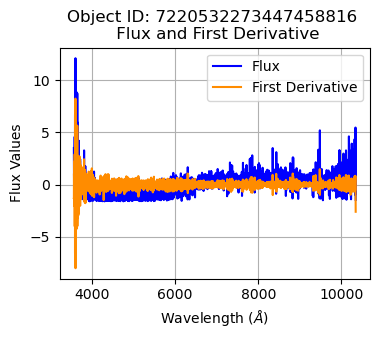

In [27]:
first_object_id, data_arrays = next(iter(first_derv_spec_dict.items()))

flux = data_arrays[0]
wavelength = data_arrays[1]
first_derivative = data_arrays[3]

plt.figure(figsize=(4, 3))

plt.plot(wavelength, flux, label='Flux', color='blue')
# overlay Derivative
plt.plot(wavelength, first_derivative, label='First Derivative', color='darkorange')
plt.xlabel(f'Wavelength ($\\AA$)')
plt.ylabel('Flux Values')  
plt.title(f'Object ID: {first_object_id} \n Flux and First Derivative')
plt.grid(True)
plt.legend()
#plt.xlim(3500, 3600)
#plt.ylim(-2, 2)
plt.show()

### Second Derivative 

In [28]:
### Second Derivative 
instance_example.augment_data(2)
second_derv_spec_dict = instance_example.get_spec_dict()
next(iter(second_derv_spec_dict.items()))

(7220532273447458816,
 [array([ 3.49883537,  2.42486092,  1.3510577 , ...,  5.45684425,
          4.72944315, -1.47146404]),
  array([ 3561.2297,  3562.0508,  3562.8704, ..., 10339.515 , 10341.888 ,
         10344.272 ], dtype=float32),
  array([ 3.86135782,  0.74542748, -0.329679  , ...,  4.56577222,
          1.52617162, -5.48607219]),
  array([-1.30805808, -1.30912352,  0.14546918, ...,  0.67455158,
         -1.45054667, -2.60021661]),
  array([-1.29766046e-03,  8.87545281e-01,  1.43606563e+00, ...,
         -4.83356149e-01, -6.89311111e-01, -4.82089282e-01])])

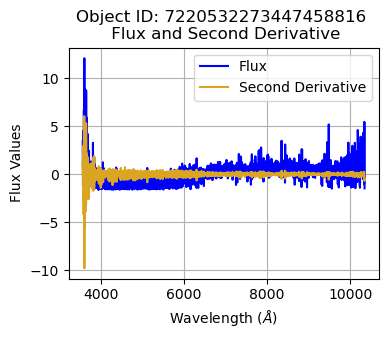

In [29]:
second_object_id, data_arrays = next(iter(second_derv_spec_dict.items()))

flux = data_arrays[0]
wavelength = data_arrays[1]
second_derivative = data_arrays[4]

plt.figure(figsize=(4, 3))

plt.plot(wavelength, flux, label='Flux', color='blue')
# overlay Derivative
plt.plot(wavelength, second_derivative, label='Second Derivative', color='goldenrod')
plt.xlabel(f'Wavelength ($\\AA$)')
plt.ylabel('Flux Values')  
plt.title(f'Object ID: {second_object_id} \n Flux and Second Derivative')
plt.grid(True)
plt.legend()
#plt.xlim(3500, 4000)
#plt.ylim(-2, 2)
plt.show()

## Elapsed time for the entire notebook

In [30]:
# record the end time
end_time = time.time()

# calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for the entire notebook: {elapsed_time:.2f} seconds")

Elapsed time for the entire notebook: 201.38 seconds
